## Case 3 Karolina Słapek Wiktor Pyka Kacper Szczepanik

In [1]:
import pandas as pd
import seaborn as sns
from pylab import *
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import sympy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import spearmanr

In [2]:
sns.set_style(style="darkgrid")

In [3]:
df = pd.read_csv('income2wampoprzeksztalceniach.csv', sep = ';')
df.head()

,Unnamed: 0,age,edu_non_grad,edu_hs_grad,edu_uni_col_uni_grad,edu_prof_or_phd_grad,wage_per_hour,marital_status,race,sex,member_of_labor_union,lwage,age_2,raceXedu_non_grad,raceXedu_prof_or_phd_grad,raceXedu_uni_col_uni_grad,sexXedu_non_grad,sexXedu_prof_or_phd_grad,sexXedu_uni_col_uni_grad
0,0,15,1,0,0,0,435,0,0,1,0,6.075346,225,0,0,0,1,0,0
1,1,15,1,0,0,0,300,0,0,1,0,5.703782,225,0,0,0,1,0,0
2,2,15,1,0,0,0,200,0,0,1,0,5.298317,225,0,0,0,1,0,0
3,3,15,1,0,0,0,500,0,0,0,0,6.214608,225,0,0,0,0,0,0
4,4,15,1,0,0,0,425,0,0,0,0,6.052089,225,0,0,0,0,0,0


### Współczynnik korelacji rang spearmana

In [4]:
df.corr(method='spearman',min_periods=1)

,Unnamed: 0,age,edu_non_grad,edu_hs_grad,edu_uni_col_uni_grad,edu_prof_or_phd_grad,wage_per_hour,marital_status,race,sex,member_of_labor_union,lwage,age_2,raceXedu_non_grad,raceXedu_prof_or_phd_grad,raceXedu_uni_col_uni_grad,sexXedu_non_grad,sexXedu_prof_or_phd_grad,sexXedu_uni_col_uni_grad
Unnamed: 0,1.000000,0.999735,-0.108355,0.103448,-0.024855,0.038409,0.336783,0.386909,0.004602,0.026227,0.175123,0.336783,0.999735,0.003448,0.018321,-0.010091,-0.065614,0.018251,-0.022000
age,0.999735,1.000000,-0.108726,0.103727,-0.024846,0.038406,0.336806,0.387189,0.004556,0.026355,0.175529,0.336806,1.000000,0.003175,0.018305,-0.010071,-0.065858,0.018109,-0.022116
edu_non_grad,-0.108355,-0.108726,1.000000,-0.363852,-0.398341,-0.032600,-0.270475,-0.114300,0.024693,-0.069848,-0.067290,-0.270475,-0.108726,0.382397,-0.010553,-0.121155,0.627549,-0.023224,-0.257971
edu_hs_grad,0.103448,0.103727,-0.363852,1.000000,-0.698945,-0.057201,0.007165,0.067084,-0.019237,-0.024491,0.070307,0.007165,0.103727,-0.139136,-0.018516,-0.212583,-0.228335,-0.040749,-0.452646
edu_uni_col_uni_grad,-0.024855,-0.024846,-0.398341,-0.698945,1.000000,-0.062623,0.186321,0.018758,0.001474,0.077416,-0.017084,0.186321,-0.024846,-0.152325,-0.020271,0.304148,-0.249979,-0.044612,0.647613
edu_prof_or_phd_grad,0.038409,0.038406,-0.032600,-0.057201,-0.062623,1.000000,0.086854,0.015430,-0.009301,-0.001069,-0.006196,0.086854,0.038406,-0.012466,0.323702,-0.019047,-0.020458,0.712386,-0.040555
wage_per_hour,0.336783,0.336806,-0.270475,0.007165,0.186321,0.086854,1.000000,0.271429,-0.045520,-0.198642,0.327234,1.000000,0.336806,-0.101476,0.030389,0.048796,-0.238883,0.063311,0.045829
marital_status,0.386909,0.387189,-0.114300,0.067084,0.018758,0.015430,0.271429,1.000000,-0.105473,-0.036042,0.109028,0.271429,0.387189,-0.063980,0.005811,-0.049379,-0.109557,0.004552,-0.008096
race,0.004602,0.004556,0.024693,-0.019237,0.001474,-0.009301,-0.045520,-0.105473,1.000000,0.022658,0.044197,-0.045520,0.004556,0.411473,0.054758,0.628681,0.026229,-0.001984,0.018283
sex,0.026227,0.026355,-0.069848,-0.024491,0.077416,-0.001069,-0.198642,-0.036042,0.022658,1.000000,-0.170764,-0.198642,0.026355,-0.014660,0.006976,0.045028,0.276636,0.049369,0.548398


In [5]:
y=df['lwage']
X=df[['age','age_2','edu_non_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad','marital_status','member_of_labor_union','sex','race','raceXedu_uni_col_uni_grad','sexXedu_uni_col_uni_grad','sexXedu_non_grad']]
X= sm.add_constant(X)

C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [6]:
model9=smf.ols(formula = 'lwage ~ age + age_2 + edu_non_grad + edu_uni_col_uni_grad + edu_prof_or_phd_grad + marital_status + member_of_labor_union + sex + race +raceXedu_uni_col_uni_grad + sexXedu_uni_col_uni_grad +sexXedu_non_grad',data=df).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     421.0
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:05:41   Log-Likelihood:                -6365.4
No. Observations:               11179   AIC:                         1.276e+04
Df Residuals:                   11166   BIC:                         1.285e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.6959      0.034    169.212      0.000       5.630       5.762
age                           0.0510      0.002     28.890      0.000       0.048       0.054
age_2                        -0.0005   2.11e-05    -25.226      0.000      -0.001      -0.000
edu_non_grad                 -0.1946      0.016    -12.024      0.000      -0.226      -0.163
edu_uni_col_uni_grad          0.0724      0.013      5.395      0.000       0.046       0.099
edu_prof_or_phd_grad          0.7798      0.057     13.662      0.000       0.668       0.892
marital_status                0.0730      0.009      7.982      0.000       0.055       0.091
member_of_labor_union         0.2818      0.011     25.286      0.000       0.260       0.304
sex                          -0.2689      0.013    -20.593      0.000      -0.295      -0.243
race                         -0.0907      0.015     -6.000      0.000      -0.120      -0.061
raceXedu_uni_col_uni_grad     0.0618      0.023      2.716      0.007       0.017       0.106
sexXedu_uni_col_uni_grad      0.1404      0.018      7.842      0.000       0.105       0.175
sexXedu_non_grad              0.1047      0.024      4.441      0.000       0.059       0.151
==============================================================================
Omnibus:                      973.884   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4359.813
Skew:                           0.322   Prob(JB):                         0.00
Kurtosis:                       5.991   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model9R=smf.ols(formula = 'lwage ~ age + age_2 + edu_non_grad + edu_uni_col_uni_grad + edu_prof_or_phd_grad + marital_status + member_of_labor_union + sex + race +raceXedu_uni_col_uni_grad + sexXedu_uni_col_uni_grad +sexXedu_non_grad',data=df).fit(cov_type='HC0')
model9R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     547.9
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:05:41   Log-Likelihood:                -6365.4
No. Observations:               11179   AIC:                         1.276e+04
Df Residuals:                   11166   BIC:                         1.285e+04
Df Model:                          12                                         
Covariance Type:                  HC0                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.6959      0.037    154.249      0.000       5.624       5.768
age                           0.0510      0.002     24.239      0.000       0.047       0.055
age_2                        -0.0005   2.63e-05    -20.235      0.000      -0.001      -0.000
edu_non_grad                 -0.1946      0.014    -13.519      0.000      -0.223      -0.166
edu_uni_col_uni_grad          0.0724      0.014      5.359      0.000       0.046       0.099
edu_prof_or_phd_grad          0.7798      0.077     10.063      0.000       0.628       0.932
marital_status                0.0730      0.010      7.612      0.000       0.054       0.092
member_of_labor_union         0.2818      0.011     26.465      0.000       0.261       0.303
sex                          -0.2689      0.012    -21.537      0.000      -0.293      -0.244
race                         -0.0907      0.014     -6.611      0.000      -0.118      -0.064
raceXedu_uni_col_uni_grad     0.0618      0.022      2.760      0.006       0.018       0.106
sexXedu_uni_col_uni_grad      0.1404      0.018      7.689      0.000       0.105       0.176
sexXedu_non_grad              0.1047      0.021      5.035      0.000       0.064       0.146
==============================================================================
Omnibus:                      973.884   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4359.813
Skew:                           0.322   Prob(JB):                         0.00
Kurtosis:                       5.991   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
Stargazer([model9, model9R])

In [9]:
plt.rc('figure', figsize = (12,8))

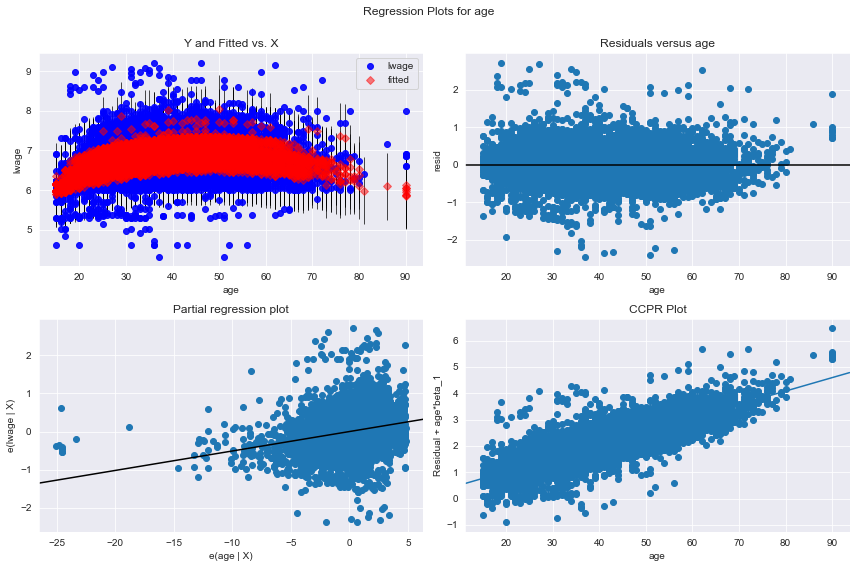

In [10]:
sm.graphics.plot_regress_exog(model9R, 'age')
show()

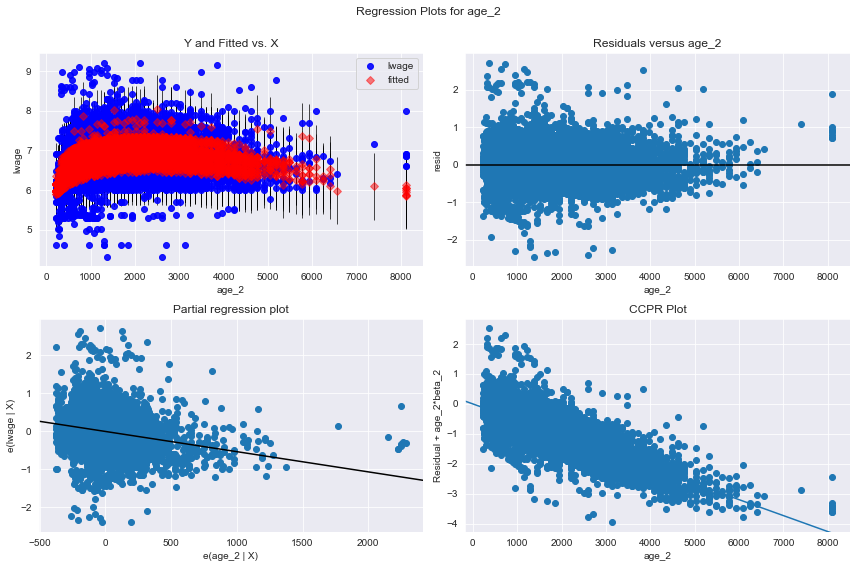

In [11]:
sm.graphics.plot_regress_exog(model9R, 'age_2')
show()

In [12]:
model9R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     547.9
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:05:43   Log-Likelihood:                -6365.4
No. Observations:               11179   AIC:                         1.276e+04
Df Residuals:                   11166   BIC:                         1.285e+04
Df Model:                          12                                         
Covariance Type:                  HC0                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.6959      0.037    154.249      0.000       5.624       5.768
age                           0.0510      0.002     24.239      0.000       0.047       0.055
age_2                        -0.0005   2.63e-05    -20.235      0.000      -0.001      -0.000
edu_non_grad                 -0.1946      0.014    -13.519      0.000      -0.223      -0.166
edu_uni_col_uni_grad          0.0724      0.014      5.359      0.000       0.046       0.099
edu_prof_or_phd_grad          0.7798      0.077     10.063      0.000       0.628       0.932
marital_status                0.0730      0.010      7.612      0.000       0.054       0.092
member_of_labor_union         0.2818      0.011     26.465      0.000       0.261       0.303
sex                          -0.2689      0.012    -21.537      0.000      -0.293      -0.244
race                         -0.0907      0.014     -6.611      0.000      -0.118      -0.064
raceXedu_uni_col_uni_grad     0.0618      0.022      2.760      0.006       0.018       0.106
sexXedu_uni_col_uni_grad      0.1404      0.018      7.689      0.000       0.105       0.176
sexXedu_non_grad              0.1047      0.021      5.035      0.000       0.064       0.146
==============================================================================
Omnibus:                      973.884   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4359.813
Skew:                           0.322   Prob(JB):                         0.00
Kurtosis:                       5.991   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df['residuals'] = model9.resid

In [15]:
df.head(10)

,Unnamed: 0,age,edu_non_grad,edu_hs_grad,edu_uni_col_uni_grad,edu_prof_or_phd_grad,wage_per_hour,marital_status,race,sex,member_of_labor_union,lwage,age_2,raceXedu_non_grad,raceXedu_prof_or_phd_grad,raceXedu_uni_col_uni_grad,sexXedu_non_grad,sexXedu_prof_or_phd_grad,sexXedu_uni_col_uni_grad,residuals
0,0,15,1,0,0,0,435,0,0,1,0,6.075346,225,0,0,0,1,0,0,0.092690
1,1,15,1,0,0,0,300,0,0,1,0,5.703782,225,0,0,0,1,0,0,-0.278873
2,2,15,1,0,0,0,200,0,0,1,0,5.298317,225,0,0,0,1,0,0,-0.684339
3,3,15,1,0,0,0,500,0,0,0,0,6.214608,225,0,0,0,0,0,0,0.067735
4,4,15,1,0,0,0,425,0,0,0,0,6.052089,225,0,0,0,0,0,0,-0.094784
5,5,15,1,0,0,0,475,0,0,1,0,6.163315,225,0,0,0,1,0,0,0.180659
6,6,15,1,0,0,0,450,0,0,1,0,6.109248,225,0,0,0,1,0,0,0.126592
7,7,15,1,0,0,0,350,0,0,0,0,5.857933,225,0,0,0,0,0,0,-0.288940
8,8,15,1,0,0,0,500,0,0,0,0,6.214608,225,0,0,0,0,0,0,0.067735
9,9,15,1,0,0,0,425,0,0,1,0,6.052089,225,0,0,0,1,0,0,0.069433


In [16]:
df['residuals_2'] = model9.resid*model9.resid

In [17]:
df.head(10)

,Unnamed: 0,age,edu_non_grad,edu_hs_grad,edu_uni_col_uni_grad,edu_prof_or_phd_grad,wage_per_hour,marital_status,race,sex,...,lwage,age_2,raceXedu_non_grad,raceXedu_prof_or_phd_grad,raceXedu_uni_col_uni_grad,sexXedu_non_grad,sexXedu_prof_or_phd_grad,sexXedu_uni_col_uni_grad,residuals,residuals_2
0,0,15,1,0,0,0,435,0,0,1,...,6.075346,225,0,0,0,1,0,0,0.092690,0.008591
1,1,15,1,0,0,0,300,0,0,1,...,5.703782,225,0,0,0,1,0,0,-0.278873,0.077770
2,2,15,1,0,0,0,200,0,0,1,...,5.298317,225,0,0,0,1,0,0,-0.684339,0.468319
3,3,15,1,0,0,0,500,0,0,0,...,6.214608,225,0,0,0,0,0,0,0.067735,0.004588
4,4,15,1,0,0,0,425,0,0,0,...,6.052089,225,0,0,0,0,0,0,-0.094784,0.008984
5,5,15,1,0,0,0,475,0,0,1,...,6.163315,225,0,0,0,1,0,0,0.180659,0.032638
6,6,15,1,0,0,0,450,0,0,1,...,6.109248,225,0,0,0,1,0,0,0.126592,0.016025
7,7,15,1,0,0,0,350,0,0,0,...,5.857933,225,0,0,0,0,0,0,-0.288940,0.083486
8,8,15,1,0,0,0,500,0,0,0,...,6.214608,225,0,0,0,0,0,0,0.067735,0.004588
9,9,15,1,0,0,0,425,0,0,1,...,6.052089,225,0,0,0,1,0,0,0.069433,0.004821


In [22]:
names1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']


### Składnik losowy ma rozklad normalny 

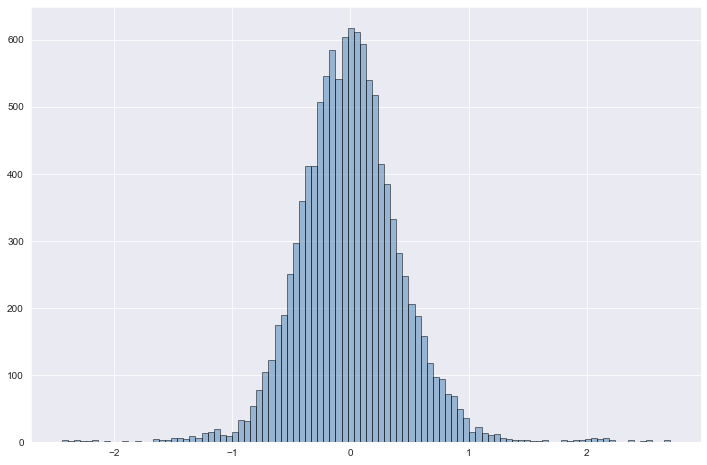

In [72]:
hist(model9.resid, bins = 100, color = 'steelblue', edgecolor = 'black', alpha = 0.5)
show()

## Skośność

In [25]:
model9.resid.skew()

0.3221289306211461

## Kurtoza

In [26]:
model9.resid.kurtosis()

2.9927027480994237

In [27]:
hip1 ='(sex = 0)'

In [28]:
f_test = model9.f_test(hip1)
f_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[424.06822799]]), p=1.6429498481480404e-92, df_denom=1.12e+04, df_num=1>

zadanie4
### Test reset

In [73]:
testreset = sms.linear_reset(model9, use_f = True)
testreset

C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[42.36717558]]), p=4.673531009078262e-19, df_denom=1.12e+04, df_num=2>

H0: liniowa forma funkcyjna

H1: nieliniowa forma funkcyjna

P-value = 0.00<0.05

Odrzucamy H0 o liniowości formy funkcyjnej.
Metody rozwiązania problemu: uchwycenie korelacji, nieliniowości, przekształcenia lub zmiana metody estymacji.

5 zadanie

Za pomocą tego wykresu można zweryfikować założenie KRML dotyczące Stałości wariancji reszt.

Na wykresie możemy zauważyć że mamy doczynienia z heteroskedastycznością.

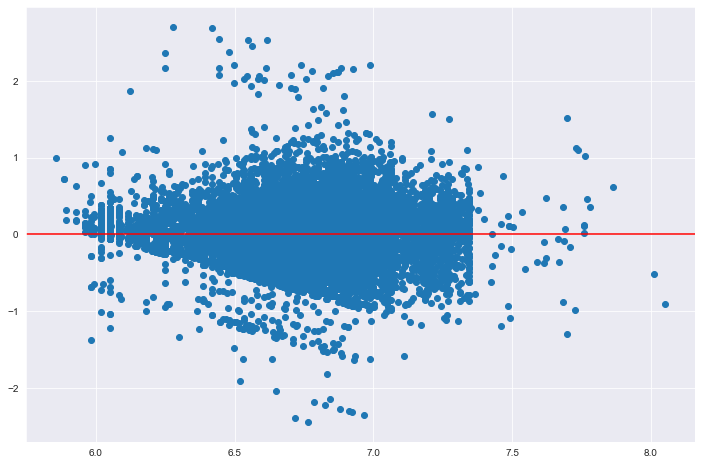

In [71]:
scatter(model9.fittedvalues, model9.resid)
axhline(y = 0, color = 'red')
show()

zadanie 6

## Test white 

In [30]:
testwhite1 = sms.het_white(model9R.resid, model9R.model.exog)
testwhite1

(318.0220021845363,
 6.379860562895858e-38,
 5.712907846668566,
 1.3592869928584205e-38)

In [31]:
lzip = [names1, testwhite1]
lzip

[['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'],
 (318.0220021845363,
  6.379860562895858e-38,
  5.712907846668566,
  1.3592869928584205e-38)]

In [32]:
testwhite = sms.het_white(model9.resid, model9.model.exog)
testwhite

(318.0220021845363,
 6.379860562895858e-38,
 5.712907846668566,
 1.3592869928584205e-38)

In [33]:
lzip = [names1, testwhite]
lzip

[['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'],
 (318.0220021845363,
  6.379860562895858e-38,
  5.712907846668566,
  1.3592869928584205e-38)]

## Test Breusha Pagana

In [34]:
testBP = sms.het_breuschpagan(model9.resid, model9.model.exog)
testBP

(160.47830548655443,
 4.196609743575155e-28,
 13.552186708457837,
 2.567065473713301e-28)

In [35]:
lzip = [names1, testBP]
lzip

[['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'],
 (160.47830548655443,
  4.196609743575155e-28,
  13.552186708457837,
  2.567065473713301e-28)]

Rozkład empiryczny składnika losolowego mniej więcej pokrywa się rozkładem teoretycznym, z odstającymi obserwacjami na po obydwu stronach rozkładu

C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


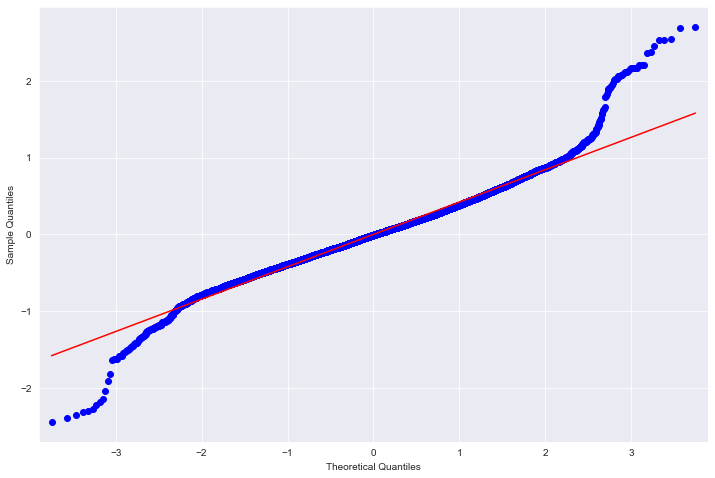

In [36]:
sm.qqplot(model9.resid, line = 'r')
show()

##  Test Jarque Bera

In [37]:
sms.jarque_bera(model9.resid)

(4359.813339805345, 0.0, 0.32208570569881206, 5.990827705319683)

Dźwignia

In [38]:
len(model9.params)-1

12

In [39]:
h=len(model9.params)-1

In [40]:
limit_h = 2*h/model9.nobs
limit_h

0.0021468825476339565

## Test Breusha - Godfreya

In [42]:
test3 = sms.acorr_breusch_godfrey(model9)
test3

C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:826: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setnlags or period to silence this warning.
  warnings.warn("The default value of nlags is changing.  After 0.12, "


(53.836371640679666,
 0.05730032307678769,
 1.3806476442168503,
 0.057634607489291535)

In [43]:
lzip = [names1,test3]
lzip

[['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'],
 (53.836371640679666,
  0.05730032307678769,
  1.3806476442168503,
  0.057634607489291535)]

Test Breuscha-Godfreya dotyczy weryfikacji założenia o braku autokorelacji reszt. W przypadku niespełniania założeń w modelu macierz wariancji-kowariancji jest obciążona, estymator nieobciążony ale nieefektywny.

f p-value= 0.057634607489291535>alfa=0.05 a więc brak podstaw do odrzucenia hipotezy zerowej.

## Dźwignia Cook'a

In [50]:
np.set_printoptions(suppress=True)

In [51]:
influence = model9.get_influence()

In [54]:
cooks=influence.cooks_distance

(array([0.00000602, 0.0000545 , 0.00032818, ..., 0.00458709, 0.00355968,
        0.00591772]),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [64]:
print(cooks[0])

[0.00000602 0.0000545  0.00032818 ... 0.00458709 0.00355968 0.00591772]


In [66]:
summary=influence.summary_frame()

In [67]:
summary.head(10)

,dfb_Intercept,dfb_age,dfb_age_2,dfb_edu_non_grad,dfb_edu_uni_col_uni_grad,dfb_edu_prof_or_phd_grad,dfb_marital_status,dfb_member_of_labor_union,dfb_sex,dfb_race,dfb_raceXedu_uni_col_uni_grad,dfb_sexXedu_uni_col_uni_grad,dfb_sexXedu_non_grad,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.004100,-0.003733,0.003287,-0.000603,-0.000259,0.000093,0.000360,0.000470,0.000244,-0.001256,0.000924,-0.000145,0.004502,0.000006,0.216814,0.001662,0.008847,0.216805,0.008847
1,-0.012337,0.011232,-0.009890,0.001814,0.000780,-0.000279,-0.001082,-0.001415,-0.000735,0.003778,-0.002781,0.000437,-0.013545,0.000054,-0.652321,0.001662,-0.026617,-0.652304,-0.026617
2,-0.030276,0.027566,-0.024271,0.004451,0.001913,-0.000685,-0.002656,-0.003472,-0.001804,0.009272,-0.006826,0.001071,-0.033241,0.000328,-1.600756,0.001662,-0.065317,-1.600868,-0.065322
3,0.003090,-0.002791,0.002502,0.003402,-0.000182,0.000064,-0.000062,0.000099,0.000131,-0.000805,0.000596,-0.000094,-0.002794,0.000003,0.158422,0.001430,0.005996,0.158415,0.005996
4,-0.004324,0.003905,-0.003501,-0.004761,0.000254,-0.000089,0.000087,-0.000138,-0.000184,0.001126,-0.000833,0.000132,0.003910,0.000005,-0.221686,0.001430,-0.008390,-0.221677,-0.008390
5,0.007992,-0.007276,0.006407,-0.001175,-0.000505,0.000181,0.000701,0.000917,0.000476,-0.002448,0.001802,-0.000283,0.008774,0.000023,0.422584,0.001662,0.017243,0.422569,0.017243
6,0.005600,-0.005099,0.004489,-0.000823,-0.000354,0.000127,0.000491,0.000642,0.000334,-0.001715,0.001262,-0.000198,0.006148,0.000011,0.296114,0.001662,0.012083,0.296102,0.012082
7,-0.013181,0.011904,-0.010674,-0.014513,0.000775,-0.000272,0.000266,-0.000421,-0.000560,0.003432,-0.002540,0.000402,0.011918,0.000050,-0.675789,0.001430,-0.025577,-0.675773,-0.025577
8,0.003090,-0.002791,0.002502,0.003402,-0.000182,0.000064,-0.000062,0.000099,0.000131,-0.000805,0.000596,-0.000094,-0.002794,0.000003,0.158422,0.001430,0.005996,0.158415,0.005996
9,0.003071,-0.002797,0.002462,-0.000452,-0.000194,0.000070,0.000269,0.000352,0.000183,-0.000941,0.000692,-0.000109,0.003372,0.000003,0.162413,0.001662,0.006627,0.162406,0.006627


In [69]:
leverage = summary[["cooks_d","standard_resid","hat_diag"]]
leverage.head(10)

,cooks_d,standard_resid,hat_diag
0,0.000006,0.216814,0.001662
1,0.000054,-0.652321,0.001662
2,0.000328,-1.600756,0.001662
3,0.000003,0.158422,0.001430
4,0.000005,-0.221686,0.001430
5,0.000023,0.422584,0.001662
6,0.000011,0.296114,0.001662
7,0.000050,-0.675789,0.001430
8,0.000003,0.158422,0.001430
9,0.000003,0.162413,0.001662


<Figure size 21600x14400 with 0 Axes>

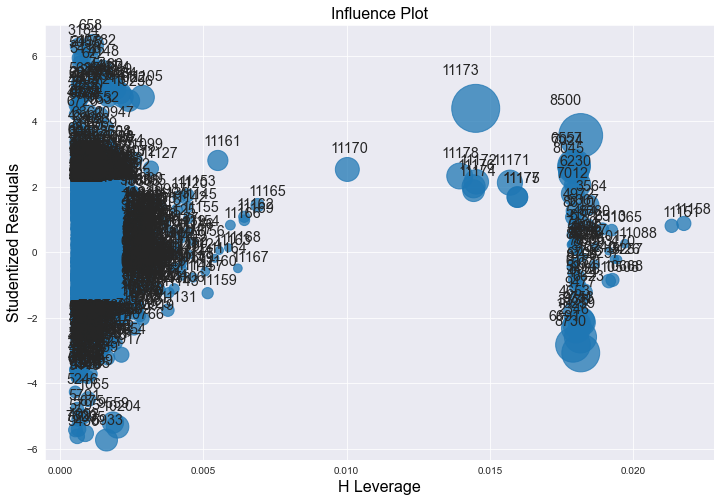

In [70]:
fig = plt.figure(figsize=(300,200))
sm.graphics.influence_plot(model9, criterion = 'Cooks')
show()

Jak widzimy na powyżyszym wykresie, w naszych danych mamy sporo obserwacji nietypowych. Pryzkładową obseracją nietypową jest obserwacja 11173 ze względu na dużą odległość cooka i standaryzowane reszty w module >2

## Problem zmiennej nieistotnej

W naszym modelu nie występuje problem zmiennej nieistotnej 
W przypadku wystąpienia w modelu zmiennej nieistotnej estymator dalej jest nieobciążony, ale ma większą wariancję, niż w modelu, w którym nie występują zmienne nieistotne. Pogarsza to precyzję oszacowań parametrów przy zmiennych istotnych.

## Współliniowość

Zadanie 10
Wynikiem wystąpienia problemu współliniowości niedokładnej jest mniejsza precyzja oszacowań, którą widać w błędach standardowych. Przyczynia się ona do zmniejszenia statystyki t, zwiększenia p-value oraz zwiększenia przedziałów ufności, przez co moglibyśmy uwzględnić zmienne nieistotne statystycznie do modelu. W celu naprawienia tego problemu warto usunąć zmienną o najwyższym VIF pod warunkiem, że jest to zmienna nieistotna statystycznie, co sprawdzamy metodą od ogólnego do szczególnego.

In [44]:
variance_inflation_factor(X.values,2)

31.10727119056282

In [47]:
variance_inflation_factor(X.values,1)

32.728473014365846

In [48]:
vif = pd.DataFrame()

In [49]:
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,69.190929,const
1,32.728473,age
2,31.107271,age_2
3,2.274926,edu_non_grad
4,2.701766,edu_uni_col_uni_grad
5,1.009220,edu_prof_or_phd_grad
6,1.268120,marital_status
7,1.085650,member_of_labor_union
8,2.601214,sex
9,1.797206,race


Wysoki VIF age i age_2 spowodowany niedokładną współliniowością tych dwóch zmiennych. Zmienne jednak sa istonte statystcznie